# Low Resource Classification

This notebooks contains results for various models using different proportions of available data in various datasets.  The idea is to see how model performance scales for different numbers of available examples.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import datetime as dt

from sklearn.model_selection import train_test_split
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

from gobbli.dataset.imdb import IMDBDataset
from gobbli.model.fasttext import FastText
from gobbli.model.bert import BERT
from gobbli.model.mtdnn import MTDNN
from gobbli.model.transformer import Transformer

import benchmark
benchmark.init_benchmark_env()

In [2]:
ds = IMDBDataset.load()
X_train_valid, X_test = ds.X_train(), ds.X_test()
y_train_valid, y_test = ds.y_train(), ds.y_test()

In [3]:
X_train_valid_fasttext, X_test_fasttext = benchmark.fasttext_preprocess(X_train_valid), benchmark.fasttext_preprocess(X_test)
X_train_valid_bert, X_test_bert = benchmark.bert_preprocess(X_train_valid), benchmark.bert_preprocess(X_test)

In [4]:
def analyze_all_results(model_cls, all_results, data_proportions):
    all_metrics = pd.DataFrame([{
        "data_proportion": p,
        **r.metrics()
    } for p, r in zip(data_proportions, all_results)])
    
    display(all_metrics)
    
    fig = plt.figure(figsize=(10, 10))
    f1_ax = fig.add_subplot()
    all_metrics.plot(x="data_proportion", y="Weighted F1 Score", ax=f1_ax)
    
    acc_ax = fig.add_subplot()
    all_metrics.plot(x="data_proportion", y="Accuracy", ax=acc_ax)
    
    plt.xlabel("Proportion of Data Used (out of 20,000 documents)")
    plt.title(f"Model Performance by Proportion of Data Used - {model_cls.__name__}")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.show()

def evaluate_model(model_cls, X, y, test_dataset, param_grid, data_proportions, run_kwargs=None):
    all_results = []
    
    for proportion in data_proportions:
        n = int(proportion * len(X))
        X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=proportion, random_state=1)
        print(f"{dt.datetime.now().strftime('[%Y-%m-%d %H:%M:%S]')} "
              f"Evaluating proportion {round(proportion, 3)} ({len(X_sampled)} obs)")
        results = benchmark.run_benchmark_experiment(f"lowresource_{model_cls.__name__}",
            X_sampled, y_sampled, model_cls, param_grid, test_dataset=test_dataset, run_kwargs=run_kwargs)
        all_results.append(results)
        
    analyze_all_results(model_cls, all_results, data_proportions)
    return all_results

In [5]:
DATA_PROPORTIONS = [0.005, 0.01, 0.05, 0.1, 0.25, 0.33, 0.5, 0.75]

[2019-08-22 04:39:50] Evaluating proportion 0.005 (125 obs)
[2019-08-22 04:40:08] Evaluating proportion 0.01 (250 obs)
[2019-08-22 04:40:26] Evaluating proportion 0.05 (1250 obs)
[2019-08-22 04:40:47] Evaluating proportion 0.1 (2500 obs)
[2019-08-22 04:41:06] Evaluating proportion 0.25 (6250 obs)
[2019-08-22 04:41:30] Evaluating proportion 0.33 (8250 obs)
[2019-08-22 04:41:55] Evaluating proportion 0.5 (12500 obs)
[2019-08-22 04:42:22] Evaluating proportion 0.75 (18750 obs)


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.333333,0.250000,0.50000,0.50000
1,0.010,0.518931,0.579225,0.55528,0.55528
2,0.050,0.743127,0.743861,0.74328,0.74328
3,0.100,0.814399,0.814408,0.81440,0.81440
4,0.250,0.846953,0.847425,0.84700,0.84700
5,0.330,0.856957,0.857429,0.85700,0.85700
6,0.500,0.862995,0.863984,0.86308,0.86308
7,0.750,0.873358,0.873383,0.87336,0.87336


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


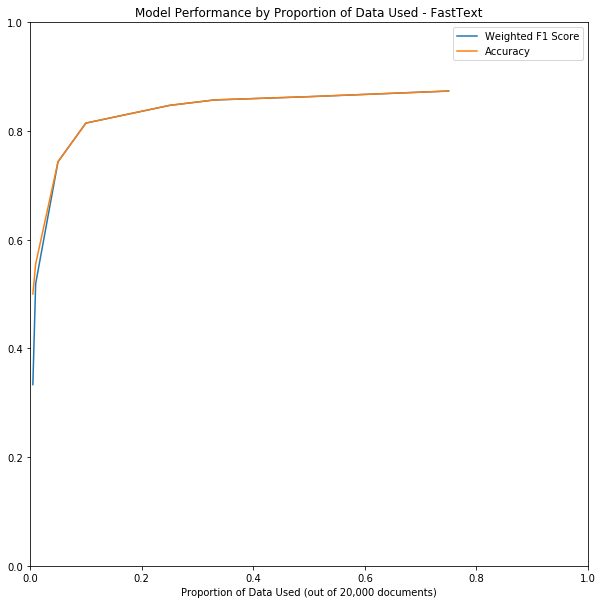

In [6]:
evaluate_model(FastText, X_train_valid_fasttext, y_train_valid, (X_test_fasttext, y_test), {
    "word_ngrams": [1],
    "dim": [100, 300],
    "lr": [0.5, 0.75, 1.0]
}, DATA_PROPORTIONS);

[2019-08-22 04:42:56] Evaluating proportion 0.005 (125 obs)
(pid=3176) /code/gobbli/model/mtdnn/model.py:193: UserWarning: MT-DNN model does not support separate validation batch size; using train batch size '16' for both training and validation.
(pid=3176)   "MT-DNN model does not support separate validation batch size; "
[2019-08-22 04:46:39] Evaluating proportion 0.01 (250 obs)
(pid=3466) /code/gobbli/model/mtdnn/model.py:193: UserWarning: MT-DNN model does not support separate validation batch size; using train batch size '16' for both training and validation.
(pid=3466)   "MT-DNN model does not support separate validation batch size; "
[2019-08-22 04:50:29] Evaluating proportion 0.05 (1250 obs)
(pid=3767) /code/gobbli/model/mtdnn/model.py:193: UserWarning: MT-DNN model does not support separate validation batch size; using train batch size '16' for both training and validation.
(pid=3767)   "MT-DNN model does not support separate validation batch size; "
[2019-08-22 04:56:03] Eval

,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.832621,0.833509,0.83272,0.83272
1,0.010,0.822400,0.829819,0.82328,0.82328
2,0.050,0.849094,0.849361,0.84912,0.84912
3,0.100,0.858374,0.859108,0.85844,0.85844
4,0.250,0.862357,0.862392,0.86236,0.86236
5,0.330,0.867248,0.868115,0.86732,0.86732
6,0.500,0.868423,0.868626,0.86844,0.86844
7,0.750,0.876480,0.876485,0.87648,0.87648


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


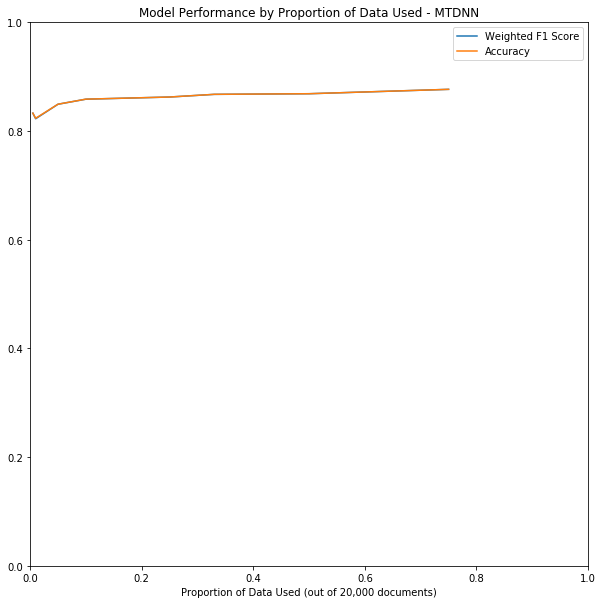

In [7]:
evaluate_model(MTDNN, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "mtdnn_model": ["mt-dnn-base"],
    "max_seq_length": [128],
}, DATA_PROPORTIONS, run_kwargs={"train_batch_size": 16});

[2019-08-22 06:36:28] Evaluating proportion 0.005 (125 obs)
[2019-08-22 06:41:50] Evaluating proportion 0.01 (250 obs)
[2019-08-22 06:46:54] Evaluating proportion 0.05 (1250 obs)
[2019-08-22 06:53:02] Evaluating proportion 0.1 (2500 obs)
[2019-08-22 07:00:28] Evaluating proportion 0.25 (6250 obs)
[2019-08-22 07:12:01] Evaluating proportion 0.33 (8250 obs)
[2019-08-22 07:25:45] Evaluating proportion 0.5 (12500 obs)
[2019-08-22 07:44:11] Evaluating proportion 0.75 (18750 obs)


,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.660963,0.670846,0.66424,0.66424
1,0.010,0.805249,0.808704,0.80572,0.80572
2,0.050,0.835206,0.835879,0.83528,0.83528
3,0.100,0.847316,0.847353,0.84732,0.84732
4,0.250,0.860145,0.860766,0.86020,0.86020
5,0.330,0.862160,0.862164,0.86216,0.86216
6,0.500,0.868996,0.869047,0.86900,0.86900
7,0.750,0.874928,0.875348,0.87496,0.87496


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


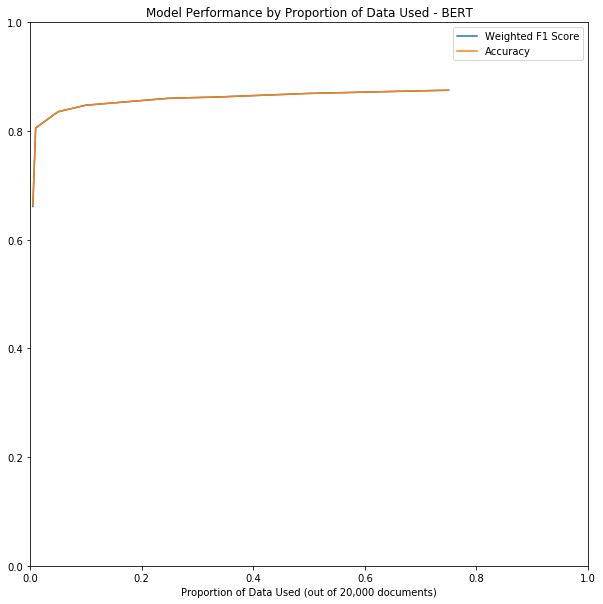

In [8]:
evaluate_model(BERT, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "bert_model": ["bert-base-uncased"],
    "max_seq_length": [128],
}, DATA_PROPORTIONS);

[2019-08-22 08:09:33] Evaluating proportion 0.005 (125 obs)
[2019-08-22 08:13:27] Evaluating proportion 0.01 (250 obs)
[2019-08-22 08:18:42] Evaluating proportion 0.05 (1250 obs)
[2019-08-22 08:26:51] Evaluating proportion 0.1 (2500 obs)
[2019-08-22 08:38:34] Evaluating proportion 0.25 (6250 obs)
[2019-08-22 09:01:49] Evaluating proportion 0.33 (8250 obs)
[2019-08-22 09:30:22] Evaluating proportion 0.5 (12500 obs)
[2019-08-22 10:10:18] Evaluating proportion 0.75 (18750 obs)


,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.534580,0.546778,0.54328,0.54328
1,0.010,0.333333,0.250000,0.50000,0.50000
2,0.050,0.333333,0.250000,0.50000,0.50000
3,0.100,0.333333,0.250000,0.50000,0.50000
4,0.250,0.333333,0.250000,0.50000,0.50000
5,0.330,0.333333,0.250000,0.50000,0.50000
6,0.500,0.656829,0.657087,0.65692,0.65692
7,0.750,0.333333,0.250000,0.50000,0.50000


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


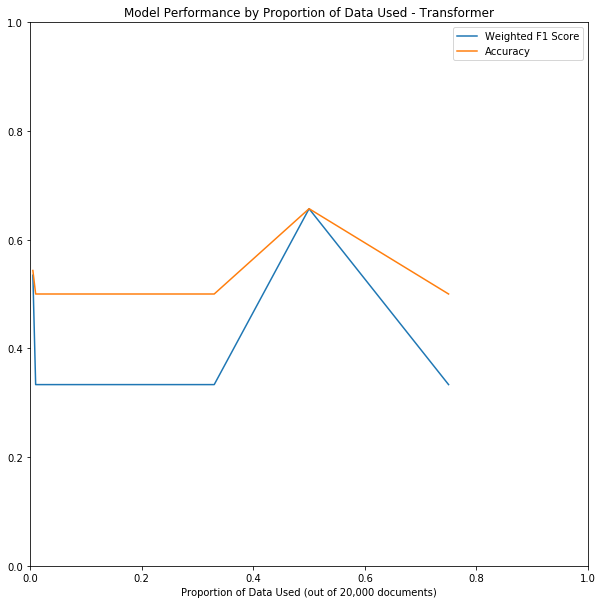

In [9]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlm-mlm-tlm-xnli15-1024", "xlm-clm-ende-1024"],
    "transformer_model": ["XLM"],
}, DATA_PROPORTIONS, run_kwargs={"train_batch_size": 16});

[2019-08-22 11:08:51] Evaluating proportion 0.005 (125 obs)
[2019-08-22 11:12:22] Evaluating proportion 0.01 (250 obs)
[2019-08-22 11:16:00] Evaluating proportion 0.05 (1250 obs)
[2019-08-22 11:21:18] Evaluating proportion 0.1 (2500 obs)
[2019-08-22 11:28:43] Evaluating proportion 0.25 (6250 obs)
[2019-08-22 11:42:13] Evaluating proportion 0.33 (8250 obs)
[2019-08-22 11:58:46] Evaluating proportion 0.5 (12500 obs)
[2019-08-22 12:22:39] Evaluating proportion 0.75 (18750 obs)


,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.678169,0.708603,0.68664,0.68664
1,0.010,0.838710,0.845308,0.83940,0.83940
2,0.050,0.860740,0.861877,0.86084,0.86084
3,0.100,0.870793,0.870879,0.87080,0.87080
4,0.250,0.878393,0.878487,0.87840,0.87840
5,0.330,0.878599,0.878613,0.87860,0.87860
6,0.500,0.887837,0.887885,0.88784,0.88784
7,0.750,0.817747,0.817850,0.81776,0.81776


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


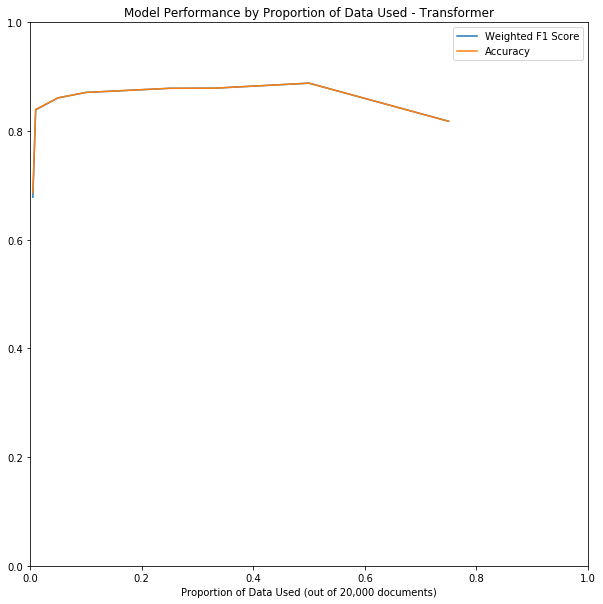

In [10]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlnet-base-cased"],
    "transformer_model": ["XLNet"],
}, DATA_PROPORTIONS, run_kwargs={"train_batch_size": 16});

[2019-08-22 12:57:01] Evaluating proportion 0.005 (125 obs)
[2019-08-22 12:59:47] Evaluating proportion 0.01 (250 obs)
[2019-08-22 13:02:39] Evaluating proportion 0.05 (1250 obs)
[2019-08-22 13:06:46] Evaluating proportion 0.1 (2500 obs)
[2019-08-22 13:12:13] Evaluating proportion 0.25 (6250 obs)
[2019-08-22 13:22:32] Evaluating proportion 0.33 (8250 obs)
[2019-08-22 13:35:11] Evaluating proportion 0.5 (12500 obs)
[2019-08-22 13:52:54] Evaluating proportion 0.75 (18750 obs)


,data_proportion,Weighted F1 Score,Weighted Precision Score,Weighted Recall Score,Accuracy
0,0.005,0.801956,0.803123,0.80212,0.80212
1,0.010,0.826460,0.830076,0.82688,0.82688
2,0.050,0.333333,0.250000,0.50000,0.50000
3,0.100,0.860399,0.860869,0.86044,0.86044
4,0.250,0.870079,0.870090,0.87008,0.87008
5,0.330,0.877410,0.877812,0.87744,0.87744
6,0.500,0.883115,0.883186,0.88312,0.88312
7,0.750,0.881115,0.881187,0.88112,0.88112


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


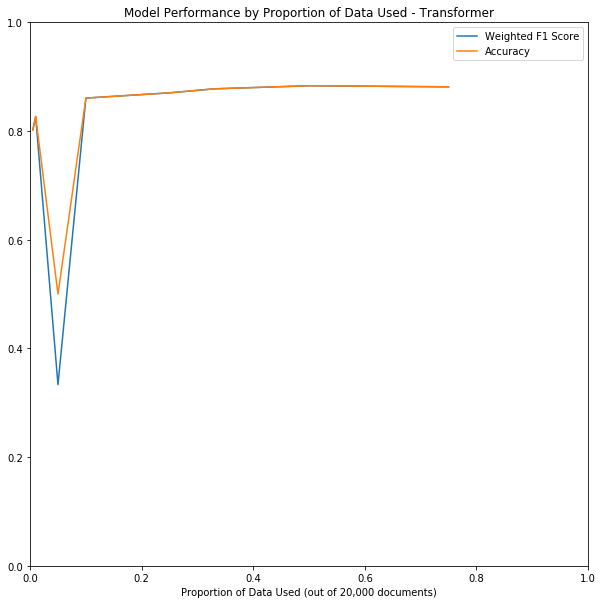

In [11]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["roberta-base"],
    "transformer_model": ["Roberta"],
}, DATA_PROPORTIONS, run_kwargs={"train_batch_size": 16});